In [218]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append("/home/weber/PycharmProjects/EXOTIC")
from statannot import add_stat_annotation

from tqdm import tqdm
tqdm.pandas()

pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from clean.src.utils import utils

## YAML FILES CONFIG
yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

# JSON
dicts = json.load(open("../../clean/src/config/EXOTIC_config.json"))


import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [ ]:
refseq_corrected_by_gtex = pd.read_parquet('/gstock/EXOTIC/data/GENOMICS/RefSeq_corrected_by_GTEx_lite.parquet')
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Gene'] == 'A2M']

In [ ]:
refseq_new = pd.read_parquet(yaml['2_EXPRESSION']['Final']['refseq_corrected_cds_recomputed'])
refseq_new.loc[refseq_new['Gene'] == 'A2M']

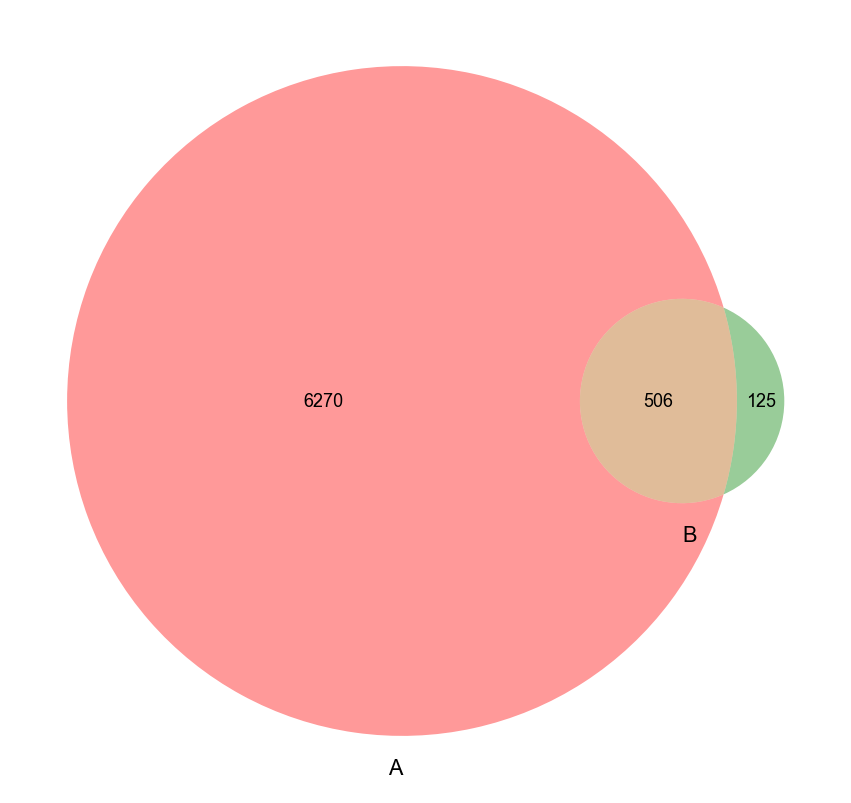

In [264]:
f = plt.figure(figsize=(15,15))
venn2([set(dext.loc[dext['dext_up'] < 0.69, 'Gene'].unique().tolist()), set(dext.loc[dext['dext_up'] >= 0.69, 'Gene'].unique().tolist())])

In [257]:
dext = pd.read_parquet(yaml['4_DEXT']['Final']['dext'])
exotic = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore.parquet')

In [304]:
dext.columns

Index(['Gene', 'ranges', 'mRNA_exons', 'mRNA_nb', 'Share', 'Strand',
       'mRNA_gene', 'mRNA_nb_total', 'Ratio', 'Ratio_num', 'Const_Alt',
       'Ratio_num_bins', 'Ratio_num_bins_update', 'MAP', 'Start', 'End',
       'Length', 'CDS_count', 'ENSG', 'HGNC', 'CHROM', 'mean_proportion',
       'Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)',
       'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary',
       'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cells - Cultured fibroblasts', 'Cells - EBV-transformed lymphocyte

In [ ]:
sorted(set(dext.MAP.unique().tolist()).difference(set(exotic.MAP.unique().tolist())))

# Load sQTL mapped on dext file

In [ ]:
dext_sqtl = pd.read_parquet(yaml['6_sQTLs']['Final']['dext_sqtl_biomart_37'])
dext_sqtl = dext_sqtl.dropna(subset=dicts['GTEx_tissues_list'], how='all')
# dext_sqtl[['Start', 'Stop']] = dext_sqtl['ranges'].str.split('-', expand=True)

In [220]:
merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_filtered_ENST_modified_zscore_test_biomart_37.parquet').reset_index(drop=True)
# merge_exotic_sqtl[['Start', 'Stop']] = merge_exotic_sqtl['Exon'].str.split('-', expand=True)


In [226]:
merge_exotic_sqtl

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perms,pv.emp
0,A2ML1,ENSG00000166535,23336,8987258-8987278,0.5,1,2,A2ML1_8987258-8987278,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
1,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
2,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
3,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
4,A2ML1,ENSG00000166535,23336,8976316-8976478,0.5,1,2,A2ML1_8976316-8976478,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464876,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,0.346833,10100,0.709534,0.915333,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
2464877,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,3.624780,10100,0.027522,0.301694,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
2464878,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,3.608718,10100,0.027918,0.303779,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
2464879,ZXDC,ENSG00000070476,28160,126178496-126178580,0.5,1,2,ZXDC_126178496-126178580,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN


In [124]:
dext_sqtl.loc[dext_sqtl['MAP'].isin(list(set(dext_sqtl.MAP.unique().tolist()).difference(set(merge_exotic_sqtl.MAP.unique().tolist())))), ['MAP','Share']].drop_duplicates()['Share'].value_counts()

True     3014
False    2949
Name: Share, dtype: int64

In [225]:
print(merge_exotic_sqtl.MAP.nunique(), dext_sqtl.MAP.nunique())

10235 13501


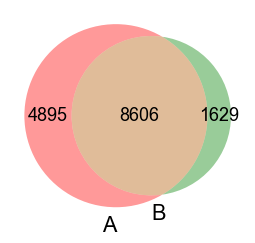

In [221]:
from matplotlib_venn import venn2
venn2([set(dext_sqtl.MAP.unique().tolist()), set(merge_exotic_sqtl.MAP.unique().tolist())])

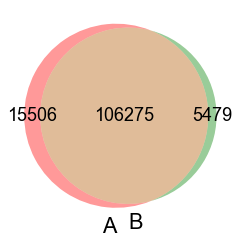

In [222]:
from matplotlib_venn import venn2
venn2([set(dext_sqtl.snpId.values.tolist()), set(merge_exotic_sqtl.snpId.values.tolist())])

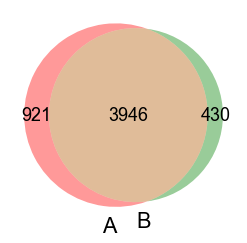

In [227]:
from matplotlib_venn import venn2
venn2([set(dext_sqtl.ENST.unique().tolist()), set(merge_exotic_sqtl.ENST.unique().tolist())])

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.05, 0.6)

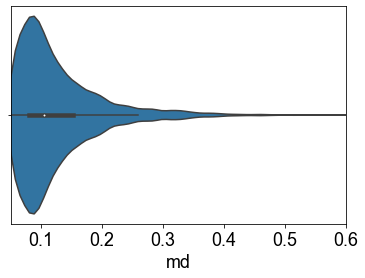

In [115]:
sns.violinplot(dext_sqtl.loc[dext_sqtl['snpId'].isin(list(set(dext_sqtl.snpId.values.tolist()).difference(set(merge_exotic_sqtl.snpId.values.tolist())))), ['snpId', 'md']].drop_duplicates()['md'])
plt.xlim(0.05, 0.6)

In [162]:
dext_sqtl.loc[dext_sqtl['snpId'].isin(list(set(dext_sqtl.snpId.values.tolist()).difference(set(merge_exotic_sqtl.snpId.values.tolist())))), 'md'].describe()
# plt.xlim(0.05, 0.6)

count    209077.000000
mean          0.133160
std           0.073840
min           0.050001
25%           0.083598
50%           0.111864
75%           0.160617
max           0.786223
Name: md, dtype: float64

In [157]:
merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(list(set(merge_exotic_sqtl.snpId.values.tolist()).difference(set(dext_sqtl.snpId.values.tolist())))), 'md'].describe()
# plt.xlim(0.05, 0.6)

count    22004.000000
mean         0.125870
std          0.081329
min          0.050007
25%          0.071270
50%          0.099702
75%          0.154466
max          0.656633
Name: md, dtype: float64

In [161]:
dext_sqtl.loc[dext_sqtl['snpId'].isin(list(set(dext_sqtl.snpId.values.tolist()).difference(set(merge_exotic_sqtl.snpId.values.tolist())))), 'ENST'].describe()
# plt.xlim(0.05, 0.6)

count              209077
unique                946
top       ENST00000428926
freq                37895
Name: ENST, dtype: object

In [163]:
merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(list(set(merge_exotic_sqtl.snpId.values.tolist()).difference(set(dext_sqtl.snpId.values.tolist())))), 'ENST'].describe()
# plt.xlim(0.05, 0.6)

count               22004
unique                413
top       ENST00000472647
freq                 2701
Name: ENST, dtype: object

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.05, 0.6)

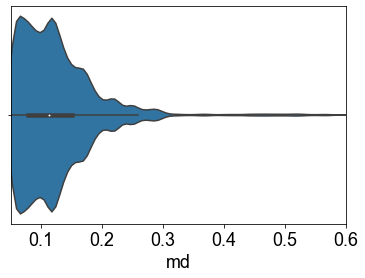

In [116]:
sns.violinplot(merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(list(set(merge_exotic_sqtl.snpId.values.tolist()).difference(set(dext_sqtl.snpId.values.tolist())))), 'md'])
plt.xlim(0.05, 0.6)

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.05, 0.6)

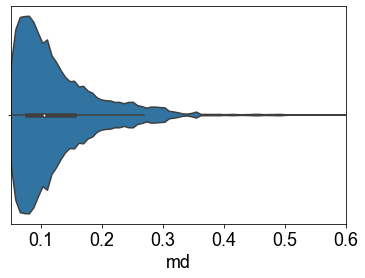

In [117]:
sns.violinplot(merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(list(set(merge_exotic_sqtl.snpId.values.tolist()).intersection(set(dext_sqtl.snpId.values.tolist())))), 'md'])
plt.xlim(0.05, 0.6)

In [71]:
dext_sqtl_lite = dext_sqtl.sample(frac=1).head(100000)

In [ ]:
list(dext_sqtl.columns)

In [19]:
min_max = 'up'
df_plot = dext_sqtl_lite[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}'.format(min_max), 'LD', 'md']].explode('dext_tissues_{}'.format(min_max))
df_plot

,Tissue,dext_tissues_up,dext_up,LD,md
128805,Skin - Not Sun Exposed (Suprapubic),Adrenal Gland,0.138631,0.033863,0.222259
156671,Thyroid,Cells - Cultured fibroblasts,0.166705,0.381790,0.152966
97348,Muscle - Skeletal,Muscle - Skeletal,0.405047,0.069738,0.069133
16430,Brain - Nucleus accumbens (basal ganglia),Liver,0.135878,0.669713,0.080341
50134,Breast - Mammary Tissue,Brain - Putamen (basal ganglia),0.078881,0.096986,0.083804
...,...,...,...,...,...
47324,Adipose - Subcutaneous,Whole Blood,0.000000,0.025963,0.162259
55212,Nerve - Tibial,Brain - Putamen (basal ganglia),0.078881,0.119275,0.062895
30027,Minor Salivary Gland,Brain - Spinal cord (cervical c-1),0.291341,0.045189,0.158745
43167,Muscle - Skeletal,Cells - EBV-transformed lymphocytes,0.163531,0.105780,0.060856


In [68]:
dext_sqtl.loc[3598509].to_dict()

{'Gene': 'ZNF268',
 'ranges': '133778730-133778748',
 'mRNA_exons': array(['NM_152943'], dtype=object),
 'mRNA_nb': 1,
 'Share': True,
 'Strand': 1,
 'mRNA_gene': array(['NM_003415', 'NM_001165881', 'NM_152943'], dtype=object),
 'mRNA_nb_total': 3,
 'Ratio': '1/3',
 'Ratio_num': 0.3333333333333333,
 'Const_Alt': 'Alt',
 'Ratio_num_bins': '0.2 - 0.4',
 'Ratio_num_bins_update': '0.2 - 0.4',
 'MAP': 'ZNF268_133778730-133778748',
 'Start': 133778730,
 'End': 133778748,
 'Length': 18,
 'CDS_count': 8,
 'ENSG': 'ENSG00000090612',
 'HGNC': 'HGNC:13061',
 'CHROM': '12',
 'mean_proportion': 0.97698,
 'Adipose - Subcutaneous': nan,
 'Adipose - Visceral (Omentum)': nan,
 'Adrenal Gland': nan,
 'Artery - Aorta': nan,
 'Artery - Coronary': nan,
 'Artery - Tibial': nan,
 'Bladder': nan,
 'Brain - Amygdala': nan,
 'Brain - Anterior cingulate cortex (BA24)': nan,
 'Brain - Caudate (basal ganglia)': nan,
 'Brain - Cerebellar Hemisphere': nan,
 'Brain - Cerebellum': nan,
 'Brain - Cortex': nan,
 'Brain 

['Non-differentially underexpressed' 'Differentially underexpressed']
['non-dsQTLs' 'dsQTLs']
Non-differentially underexpressed
non-dsQTLs
0.105132512518807
dsQTLs
0.09430027626419504
Differentially underexpressed
non-dsQTLs
0.0946463436230668
dsQTLs
0.0753426730972605


Text(0.5, 0, '')

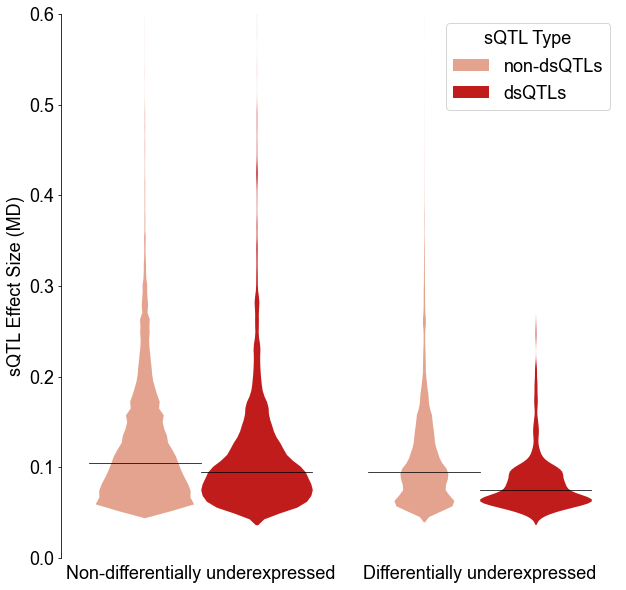

In [169]:

min_max = 'down'


bins = [0, 0.7218024591830234, 1]
labels_dext = utils.convert_bins_into_labels(bins)

df_plot = dext_sqtl[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}_reversed'.format(min_max), 'LD', 'md']].explode('dext_tissues_{}'.format(min_max))

df_plot['dext_{}_lite'.format(min_max)] = pd.cut(df_plot['dext_{}_reversed'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot.loc[df_plot['Tissue'] == df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot.loc[df_plot['Tissue'] != df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot['md_bins'] = pd.cut(df_plot['md'], bins=bins, labels=labels, include_lowest=True)


df_plot = df_plot.rename({'dext_{}_lite'.format(min_max) : 'dext-{}'.format(min_max), 'Match_tissues' : 'sQTL Type'}, axis=1)
df_plot['sQTL Type'] = df_plot['sQTL Type'].astype(str)
df_plot['sQTL Type'] = df_plot['sQTL Type'].replace({'True' : 'dsQTLs', 'False' : 'non-dsQTLs'})

d_replace = dict()
for l, new_l in zip(labels_dext, ['Non-differentially underexpressed', 'Differentially underexpressed']):
    d_replace[l] = new_l
df_plot['dext-{}'.format(min_max)] = df_plot['dext-{}'.format(min_max)].replace(d_replace)
# print(d_replace)

f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
b = sns.violinplot(data=df_plot, x='dext-{}'.format(min_max), y='md', hue='sQTL Type', showfliers=False, linewidth=0, palette=['#F39B7FFF', '#DC0000FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
print(df_plot['dext-{}'.format(min_max)].unique())
print(df_plot['sQTL Type'].unique())
for j, bin in enumerate(df_plot['dext-{}'.format(min_max)].unique()):
    print(bin)
    for match in df_plot['sQTL Type'].unique():
        print(match)

        m = df_plot.loc[(df_plot['dext-{}'.format(min_max)] == bin)  & (df_plot['sQTL Type'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'dext-{}'.format(min_max)
y = 'md'
hue = 'sQTL Type'
hue_order=['non-dsQTLs', 'dsQTLs']
hue_order = ['False', 'True']
# box_pairs=[
#     (("Non-differentially expressed", 'dsQTLs'), ("Non-differentially expressed", 'non-dsQTLs')),
#     (("Differentially expressed", "dsQTLs"), ("Differentially expressed", 'non-dsQTLs')),
#     (("Non-differentially expressed", 'dsQTLs'), ("Differentially expressed", 'dsQTLs')),
#     (("Non-differentially expressed", "non-dsQTLs"), ("Differentially expressed", "non-dsQTLs")),
#     ]

import itertools
tmp = [tuple(e) for e in itertools.product([e for e in df_plot[x].unique()], [e for e in df_plot[hue].unique()])]

box_pairs = [(tmp[0], tmp[1]), (tmp[0], tmp[2])]

# medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
# vertical_offset = data[y].median() * 0.05 # offset from median for display

# add_stat_annotation(ax, data=df_plot, x=x, y=y, order= hue_order, box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


ax.set_ylabel('sQTL Effect Size (MD)')
ax.set_xlabel('')

In [179]:
dext_sqtl_lite = dext_sqtl.head(10000)
df_plot = dext_sqtl[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}'.format(min_max), 'LD', 'md']].explode('dext_tissues_{}'.format(min_max))

min_max = 'up'


bins = [0, 0.6, 1]
labels_dext = utils.convert_bins_into_labels(bins)


df_plot['dext_{}_lite'.format(min_max)] = pd.cut(df_plot['dext_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot.loc[df_plot['Tissue'] == df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot.loc[df_plot['Tissue'] != df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot['md_bins'] = pd.cut(df_plot['md'], bins=bins, labels=labels, include_lowest=True)
df_plot

,Tissue,dext_tissues_up,dext_up,LD,md,dext_up_lite,Match_tissues,md_bins
0,Testis,Adipose - Subcutaneous,0.156704,0.016791,0.073751,0 - 0.6,False,0.05 - 0.2
0,Testis,Adipose - Visceral (Omentum),0.156704,0.016791,0.073751,0 - 0.6,False,0.05 - 0.2
0,Testis,Adrenal Gland,0.156704,0.016791,0.073751,0 - 0.6,False,0.05 - 0.2
0,Testis,Artery - Aorta,0.156704,0.016791,0.073751,0 - 0.6,False,0.05 - 0.2
0,Testis,Artery - Coronary,0.156704,0.016791,0.073751,0 - 0.6,False,0.05 - 0.2
...,...,...,...,...,...,...,...,...
3726619,Pituitary,Cells - EBV-transformed lymphocytes,0.115016,0.062477,0.096805,0 - 0.6,False,0.05 - 0.2
3726620,Pituitary,Cells - EBV-transformed lymphocytes,0.115016,0.062477,0.096805,0 - 0.6,False,0.05 - 0.2
3726621,Pituitary,Cells - EBV-transformed lymphocytes,0.115016,0.062477,0.097707,0 - 0.6,False,0.05 - 0.2
3726622,Pituitary,Cells - EBV-transformed lymphocytes,0.115016,0.062477,0.096805,0 - 0.6,False,0.05 - 0.2


In [188]:
df_plot.groupby(['dext_up_lite', 'Match_tissues', 'md_bins'])['LD'].count().reset_index()

,dext_up_lite,Match_tissues,md_bins,LD
0,0 - 0.6,False,0.05 - 0.2,4585328
1,0 - 0.6,False,0.2 - 1,635717
2,0 - 0.6,True,0.05 - 0.2,84339
3,0 - 0.6,True,0.2 - 1,14576
4,0.6 - 1,False,0.05 - 0.2,242105
5,0.6 - 1,False,0.2 - 1,25571
6,0.6 - 1,True,0.05 - 0.2,9508
7,0.6 - 1,True,0.2 - 1,1018


In [189]:
pd.pivot_table(df_plot.groupby(['dext_up_lite', 'Match_tissues', 'md_bins'])['LD'].count().reset_index(), index=['dext_up_lite', 'Match_tissues'], columns='md_bins', values='LD')

md_bins                     0.05 - 0.2  0.2 - 1
dext_up_lite Match_tissues                     
0 - 0.6      False             4585328   635717
             True                84339    14576
0.6 - 1      False              242105    25571
             True                 9508     1018

In [203]:
snp_specific_new = list(set(merge_exotic_sqtl.snpId.values.tolist()).difference(set(dext_sqtl.snpId.values.tolist())))
dext_sqtl_lite = merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(snp_specific_new)]
df_plot_lite = dext_sqtl_lite[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
df_plot_lite



min_max = 'up'

bins = [0.5, 0.8, 1]
labels_dext = utils.convert_bins_into_labels(bins)


df_plot_lite['EXOTIC_{}_lite'.format(min_max)] = pd.cut(df_plot_lite['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot_lite.loc[df_plot_lite['Tissue'] == df_plot_lite['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot_lite.loc[df_plot_lite['Tissue'] != df_plot_lite['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot_lite['md_bins'] = pd.cut(df_plot_lite['md'], bins=bins, labels=labels, include_lowest=True)


pd.pivot_table(df_plot_lite.groupby(['EXOTIC_{}_lite'.format(min_max), 'Match_tissues', 'md_bins'])['LD'].count().reset_index(), index=['EXOTIC_{}_lite'.format(min_max), 'Match_tissues'], columns='md_bins', values='LD')

md_bins                       0.05 - 0.2  0.2 - 1
EXOTIC_up_lite Match_tissues                     
0.5 - 0.8      False               61252    10525
               True                  590      387
0.8 - 1        False                  78        0
               True                    0        0

In [192]:
snp_specific_new = list(set(dext_sqtl.snpId.values.tolist()).difference(set(merge_exotic_sqtl.snpId.values.tolist())))
dext_sqtl_lite = dext_sqtl.loc[dext_sqtl['snpId'].isin(snp_specific_new)]
df_plot_lite = dext_sqtl_lite[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}'.format(min_max), 'LD', 'md']].explode('dext_tissues_{}'.format(min_max))


min_max = 'up'

bins = [0, 0.6, 1]
labels_dext = utils.convert_bins_into_labels(bins)


df_plot_lite['dext_{}_lite'.format(min_max)] = pd.cut(df_plot['dext_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot_lite.loc[df_plot_lite['Tissue'] == df_plot_lite['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot_lite.loc[df_plot_lite['Tissue'] != df_plot_lite['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot_lite['md_bins'] = pd.cut(df_plot_lite['md'], bins=bins, labels=labels, include_lowest=True)


pd.pivot_table(df_plot_lite.groupby(['dext_up_lite', 'Match_tissues', 'md_bins'])['LD'].count().reset_index(), index=['dext_up_lite', 'Match_tissues'], columns='md_bins', values='LD')

md_bins                     0.05 - 0.2  0.2 - 1
dext_up_lite Match_tissues                     
0 - 0.6      False              281667    48655
             True                 8628      831
0.6 - 1      False                7288     3040
             True                  492        0

In [204]:
snp_specific_new = list(set(merge_exotic_sqtl.snpId.values.tolist()).intersection(set(dext_sqtl.snpId.values.tolist())))
dext_sqtl_lite = merge_exotic_sqtl.loc[merge_exotic_sqtl['snpId'].isin(snp_specific_new)]
df_plot_lite = dext_sqtl_lite[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
df_plot_lite



min_max = 'up'

bins = [0.5, 0.8, 1]
labels_dext = utils.convert_bins_into_labels(bins)


df_plot_lite['EXOTIC_{}_lite'.format(min_max)] = pd.cut(df_plot_lite['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot_lite.loc[df_plot_lite['Tissue'] == df_plot_lite['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot_lite.loc[df_plot_lite['Tissue'] != df_plot_lite['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot_lite['md_bins'] = pd.cut(df_plot_lite['md'], bins=bins, labels=labels, include_lowest=True)


pd.pivot_table(df_plot_lite.groupby(['EXOTIC_{}_lite'.format(min_max), 'Match_tissues', 'md_bins'])['LD'].count().reset_index(), index=['EXOTIC_{}_lite'.format(min_max), 'Match_tissues'], columns='md_bins', values='LD')

md_bins                       0.05 - 0.2  0.2 - 1
EXOTIC_up_lite Match_tissues                     
0.5 - 0.8      False             6482371   917897
               True               106563    19062
0.8 - 1        False              250712    25990
               True                 4776      894

In [206]:
snp_specific_new = list(set(merge_exotic_sqtl.snpId.values.tolist()).intersection(set(dext_sqtl.snpId.values.tolist())))
dext_sqtl_lite = dext_sqtl.loc[dext_sqtl['snpId'].isin(snp_specific_new)]
df_plot_lite = dext_sqtl_lite[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}'.format(min_max), 'LD', 'md']].explode('dext_tissues_{}'.format(min_max))


min_max = 'up'

bins = [0, 0.6, 1]
labels_dext = utils.convert_bins_into_labels(bins)


df_plot_lite['dext_{}_lite'.format(min_max)] = pd.cut(df_plot_lite['dext_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot_lite.loc[df_plot_lite['Tissue'] == df_plot_lite['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot_lite.loc[df_plot_lite['Tissue'] != df_plot_lite['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot_lite['md_bins'] = pd.cut(df_plot_lite['md'], bins=bins, labels=labels, include_lowest=True)


pd.pivot_table(df_plot_lite.groupby(['dext_up_lite', 'Match_tissues', 'md_bins'])['LD'].count().reset_index(), index=['dext_up_lite', 'Match_tissues'], columns='md_bins', values='LD')

md_bins                     0.05 - 0.2  0.2 - 1
dext_up_lite Match_tissues                     
0 - 0.6      False             4303661   587062
             True                75711    13745
0.6 - 1      False              234817    22531
             True                 9016     1018

['Non-differentially overexpressed' 'Differentially overexpressed']
['non-dsQTLs' 'dsQTLs']
Non-differentially overexpressed
non-dsQTLs
0.10650409192238001
dsQTLs
0.102421196272483
Differentially overexpressed
non-dsQTLs
0.0883337918160158
dsQTLs
0.0735664463027797


Text(0.5, 0, '')

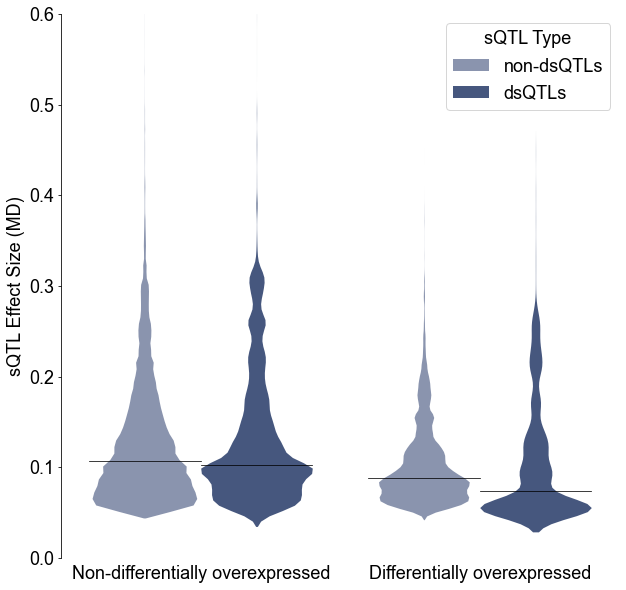

In [233]:

min_max = 'up'


bins = [0, 0.6, 1]
labels_dext = utils.convert_bins_into_labels(bins)


enst = list(set(dext_sqtl.ENST.values.tolist()).intersection(set(merge_exotic_sqtl.ENST.values.tolist())))
snpid = list(set(dext_sqtl.snpId.values.tolist()).intersection(set(merge_exotic_sqtl.snpId.values.tolist())))


df_plot = dext_sqtl[['Tissue', 'dext_tissues_{}'.format(min_max), 'dext_{}'.format(min_max), 'LD', 'md', 'snpId', 'MAP', 'ENST']].explode('dext_tissues_{}'.format(min_max))
df_plot = df_plot.loc[df_plot['ENST'].isin(enst)]
df_plot = df_plot.loc[df_plot['snpId'].isin(snpid)]

df_plot['dext_{}_lite'.format(min_max)] = pd.cut(df_plot['dext_{}'.format(min_max)], bins=bins, labels=labels_dext, include_lowest=True)


df_plot.loc[df_plot['Tissue'] == df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
df_plot.loc[df_plot['Tissue'] != df_plot['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# df_plot = df_plot.drop_duplicates(subset=['MAP', 'snpId', 'Match_tissues'])


bins = [0.05, 0.2, 1]
labels = utils.convert_bins_into_labels(bins)
df_plot['md_bins'] = pd.cut(df_plot['md'], bins=bins, labels=labels, include_lowest=True)


df_plot = df_plot.rename({'dext_{}_lite'.format(min_max) : 'dext-{}'.format(min_max), 'Match_tissues' : 'sQTL Type'}, axis=1)
df_plot['sQTL Type'] = df_plot['sQTL Type'].astype(str)
df_plot['sQTL Type'] = df_plot['sQTL Type'].replace({'True' : 'dsQTLs', 'False' : 'non-dsQTLs'})

d_replace = dict()
for l, new_l in zip(labels_dext, ['Non-differentially overexpressed', 'Differentially overexpressed']):
    d_replace[l] = new_l
df_plot['dext-{}'.format(min_max)] = df_plot['dext-{}'.format(min_max)].replace(d_replace)
# print(d_replace)

f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
b = sns.violinplot(data=df_plot, x='dext-{}'.format(min_max), y='md', hue='sQTL Type', showfliers=False, linewidth=0, palette=['#8491B4FF', '#3C5488FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
print(df_plot['dext-{}'.format(min_max)].unique())
print(df_plot['sQTL Type'].unique())
for j, bin in enumerate(df_plot['dext-{}'.format(min_max)].unique()):
    print(bin)
    for match in df_plot['sQTL Type'].unique():
        print(match)

        m = df_plot.loc[(df_plot['dext-{}'.format(min_max)] == bin)  & (df_plot['sQTL Type'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'dext-{}'.format(min_max)
y = 'md'
hue = 'sQTL Type'
hue_order=['non-dsQTLs', 'dsQTLs']
hue_order = ['False', 'True']
# box_pairs=[
#     (("Non-differentially expressed", 'dsQTLs'), ("Non-differentially expressed", 'non-dsQTLs')),
#     (("Differentially expressed", "dsQTLs"), ("Differentially expressed", 'non-dsQTLs')),
#     (("Non-differentially expressed", 'dsQTLs'), ("Differentially expressed", 'dsQTLs')),
#     (("Non-differentially expressed", "non-dsQTLs"), ("Differentially expressed", "non-dsQTLs")),
#     ]

import itertools
tmp = [tuple(e) for e in itertools.product([e for e in df_plot[x].unique()], [e for e in df_plot[hue].unique()])]

box_pairs = [(tmp[0], tmp[1]), (tmp[0], tmp[2])]

# medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
# vertical_offset = data[y].median() * 0.05 # offset from median for display

# add_stat_annotation(ax, data=df_plot, x=x, y=y, order= hue_order, box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


ax.set_ylabel('sQTL Effect Size (MD)')
ax.set_xlabel('')

In [249]:
dext_sqtl

,Gene,ranges,mRNA_exons,mRNA_nb,Share,Strand,mRNA_gene,mRNA_nb_total,Ratio,Ratio_num,...,pv,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,Tissue,gene_id,nb.perms,pv.emp
0,A2ML1,8975248-8975309,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.5,...,1.593503e-08,1.457528,10100,0.231759,0.675328,tr.second,Testis,ENSG00000166535,NaN,NaN
1,A2ML1,8975248-8975309,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.5,...,1.933534e-05,1.584675,10100,0.202752,0.648511,tr.second,Testis,ENSG00000166535,NaN,NaN
2,A2ML1,8975778-8975961,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.5,...,1.593503e-08,1.457528,10100,0.231759,0.675328,tr.second,Testis,ENSG00000166535,NaN,NaN
3,A2ML1,8975778-8975961,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.5,...,1.933534e-05,1.584675,10100,0.202752,0.648511,tr.second,Testis,ENSG00000166535,NaN,NaN
4,A2ML1,8976316-8976478,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.5,...,1.593503e-08,1.457528,10100,0.231759,0.675328,tr.second,Testis,ENSG00000166535,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968366,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.5,...,3.494158e-05,0.170040,10100,0.844669,0.965411,tr.second,Pituitary,ENSG00000036549,NaN,NaN
2968367,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.5,...,3.494158e-05,0.170040,10100,0.844669,0.965411,tr.second,Pituitary,ENSG00000036549,NaN,NaN
2968368,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.5,...,3.494158e-05,0.170040,10100,0.844669,0.965411,tr.second,Pituitary,ENSG00000036549,NaN,NaN
2968369,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.5,...,3.494158e-05,0.170040,10100,0.844669,0.965411,tr.second,Pituitary,ENSG00000036549,NaN,NaN


0.6909135388995136


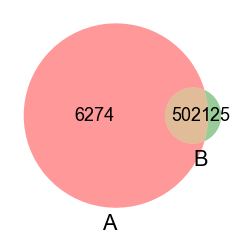

In [316]:
cutoff_up = dext.dext_up.quantile(0.95)
print(cutoff_up)
venn2([set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist()), set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist())])

In [326]:
cutoffs = list(np.arange(0.7,0.99,0.05)) + [0.99]
cutoffs

[0.7,
 0.75,
 0.8,
 0.8500000000000001,
 0.9000000000000001,
 0.9500000000000002,
 0.99]

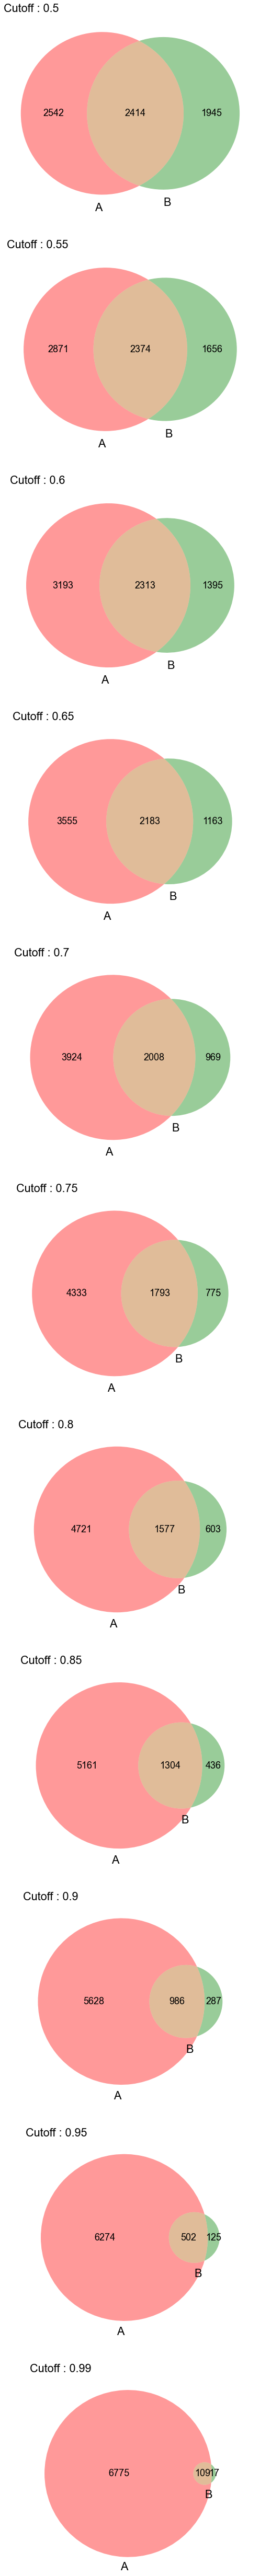

In [330]:
cutoffs = list(np.arange(0.5,0.99,0.05)) + [0.99]
f, ax = plt.subplots(ncols=1, nrows=len(list(cutoffs)), figsize=(15,90))
for j, cutoff in enumerate(cutoffs):

    cutoff_up = dext.dext_up.quantile(cutoff)
    venn2([set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist()), set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist())], ax=ax[j])
    ax[j].set_title('Cutoff : {}'.format(str(round(cutoff, 2))), loc='left')



[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ae5c9b210>
0.5 0.17051905632460773
count    218850.000000
mean          0.122659
std           0.069219
min           0.050001
25%           0.074655
50%           0.102256
75%           0.155101
max           0.745823
Name: md, dtype: float64
count    8332.000000
mean        0.150585
std         0.080254
min         0.050010
25%         0.084539
50%         0.123510
75%         0.227875
max         0.424137
Name: md, dtype: float64
0.55 0.1935751087134009
count    246425.000000
mean          0.120421
std           0.067089
min           0.050001
25%           0.074188
50%           0.100878
75%           0.150215
max           0.745823
Name: md, dtype: float64
count    7411.000000
mean        0.155715
std         0.082627
min         0.050010
25%         0.087504
50%         0.125681
75%         0.227875
max         0.424137
Name: md, dtype: float64
0.6000000000000001 0.2168913982859344
count    286953.000000
mean          0.1222

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ae5c9b210>,
      dtype=object)

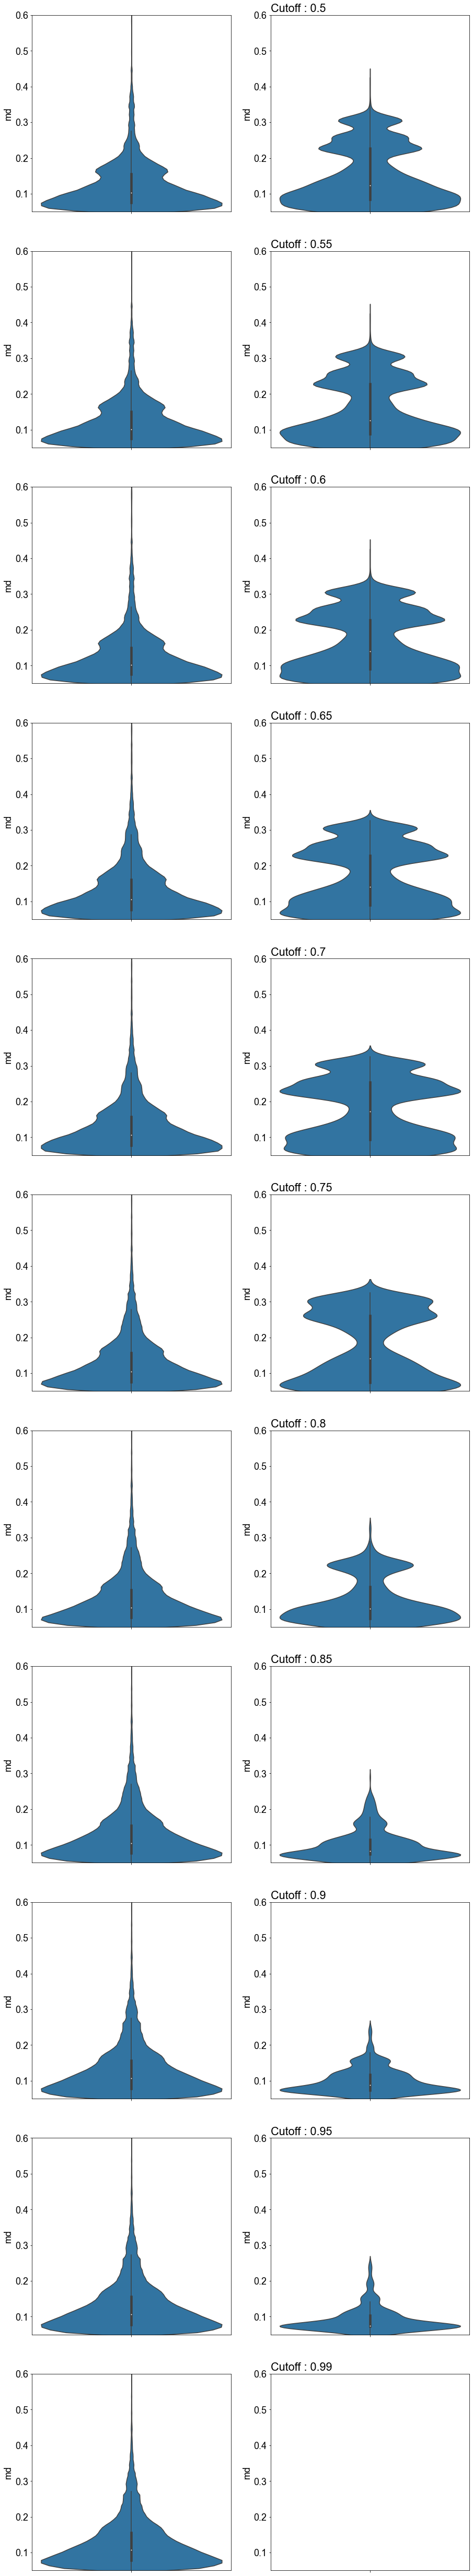

In [332]:
min_max = 'up'



cutoffs = list(np.arange(0.5,0.99,0.05)) + [0.99]

f, ax = plt.subplots(ncols=2, nrows=len(list(cutoffs)), figsize=(15,90))

# f2, ax2 = plt.subplots(ncols=2, nrows=len(list(cutoffs)), figsize=(15,10))

print(ax)

for j, cutoff in enumerate(cutoffs):

    cutoff_up = dext.dext_up.quantile(cutoff)
    print(cutoff, cutoff_up)
#     venn2([set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist()), set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist())], ax=ax2[j])
#     ax2[j].set_title('Cutoff : '.format(cutoff_up))

    undiff_spec = list(set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist()).difference(set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist())))
    diff_spec = list(set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist()).difference(set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist())))
    dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    # dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    dext_sqtl_undiff_spec = dext_sqtl_undiff_spec.drop_duplicates(subset=['ENST', 'snpId', 'Tissue']).sort_values(by=['Gene', 'ENST', 'snpId', 'Tissue'])
    dext_sqtl_undiff_spec[['Gene', 'ENST', 'md', 'snpId', 'Tissue', 'dext_tissues_up']]
    sns.violinplot(y=dext_sqtl_undiff_spec.md, ax=ax[j][0])
    ax[j][0].set_ylim(0.05,0.6)
    print(dext_sqtl_undiff_spec.md.describe())


    dext_sqtl_diff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(diff_spec)].explode('dext_tissues_{}'.format(min_max))
    dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Tissue'] == dext_sqtl_diff_spec['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
    dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Tissue'] != dext_sqtl_diff_spec['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False
    dext_sqtl_diff_spec = dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Match_tissues'] == True]

    # dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    dext_sqtl_diff_spec = dext_sqtl_diff_spec.drop_duplicates(subset=['ENST', 'snpId', 'Tissue']).sort_values(by=['Gene', 'ENST', 'snpId', 'Tissue'])
    dext_sqtl_diff_spec[['Gene', 'ENST', 'md', 'snpId', 'Tissue', 'dext_tissues_up']]

    print(dext_sqtl_diff_spec.md.describe())

    sns.violinplot(y=dext_sqtl_diff_spec.md, ax=ax[j][1])

    ax[j][1].set_ylim(0.05,0.6)
    ax[j][1].set_title('Cutoff : {}'.format(str(round(cutoff, 2))), loc='left')
    # dext_sqtl_undiff_spec.md.describe()
ax

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ae4279050>
0.5 0.17051905632460773
0.55 0.1935751087134009
0.6000000000000001 0.2168913982859344
0.6500000000000001 0.24429713812121118
0.7000000000000002 0.2766734122246868
0.7500000000000002 0.31672698392397053
0.8000000000000003 0.3640098587891093
0.8500000000000003 0.42747630702290573
0.9000000000000004 0.5144360906690899
0.9500000000000004 0.6909135388995136
0.99 0.9194516232695142


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ae4279050>,
      dtype=object)

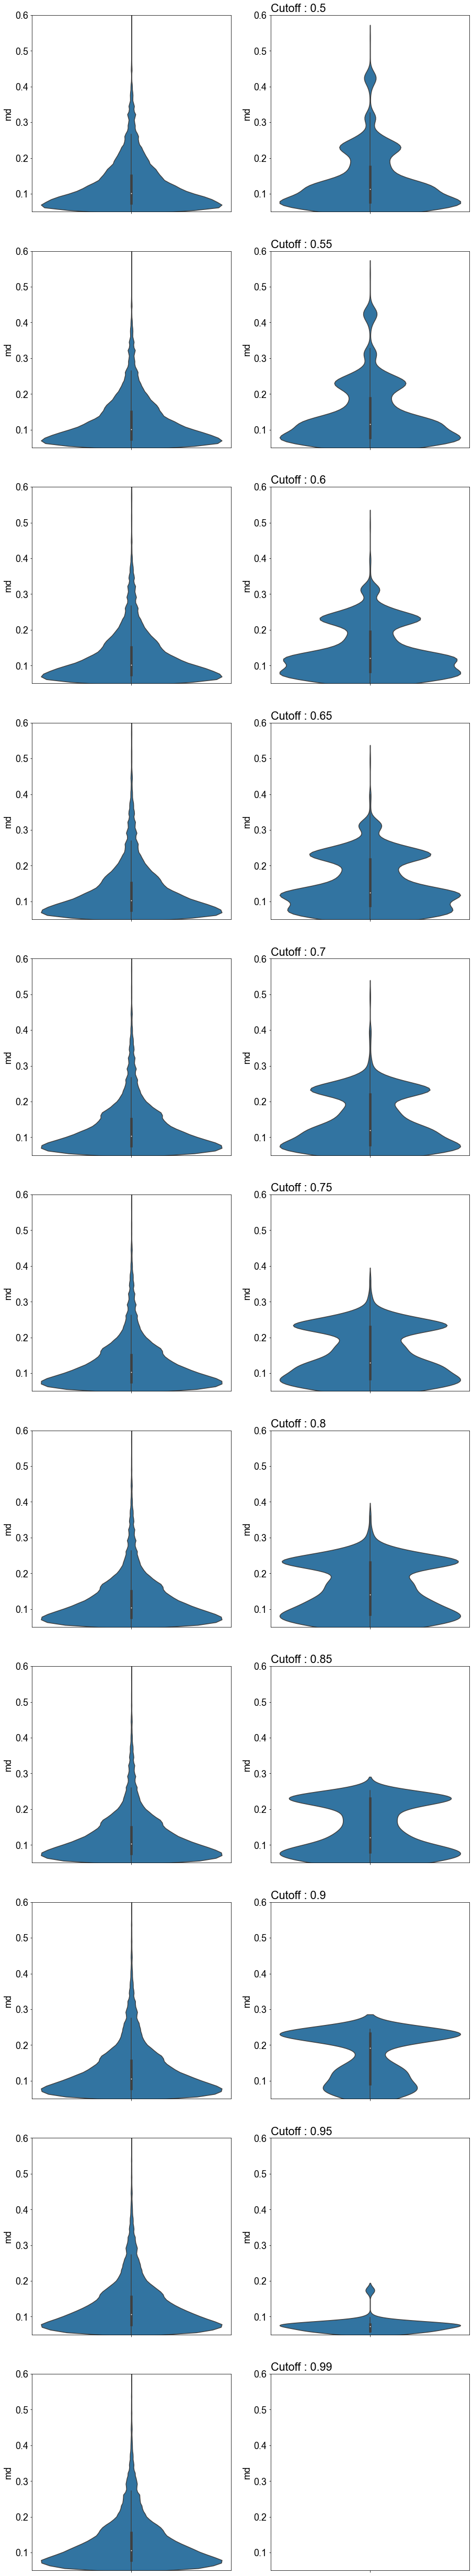

In [331]:
min_max = 'down'



cutoffs = list(np.arange(0.5,0.99,0.05)) + [0.99]

f, ax = plt.subplots(ncols=2, nrows=len(list(cutoffs)), figsize=(15,90))

# f2, ax2 = plt.subplots(ncols=2, nrows=len(list(cutoffs)), figsize=(15,10))

print(ax)

for j, cutoff in enumerate(cutoffs):

    cutoff_up = dext.dext_up.quantile(cutoff)
    print(cutoff, cutoff_up)
#     venn2([set(dext.loc[dext['dext_up'] < cutoff_up, 'Gene'].unique().tolist()), set(dext.loc[dext['dext_up'] >= cutoff_up, 'Gene'].unique().tolist())], ax=ax2[j])
#     ax2[j].set_title('Cutoff : '.format(cutoff_up))

    undiff_spec = list(set(dext.loc[dext['dext_down_reversed'] < cutoff_up, 'Gene'].unique().tolist()).difference(set(dext.loc[dext['dext_down_reversed'] >= cutoff_up, 'Gene'].unique().tolist())))
    diff_spec = list(set(dext.loc[dext['dext_down_reversed'] >= cutoff_up, 'Gene'].unique().tolist()).difference(set(dext.loc[dext['dext_down_reversed'] < cutoff_up, 'Gene'].unique().tolist())))
    dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    # dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    dext_sqtl_undiff_spec = dext_sqtl_undiff_spec.drop_duplicates(subset=['ENST', 'snpId', 'Tissue']).sort_values(by=['Gene', 'ENST', 'snpId', 'Tissue'])
    dext_sqtl_undiff_spec[['Gene', 'ENST', 'md', 'snpId', 'Tissue', 'dext_tissues_down']]
    sns.violinplot(y=dext_sqtl_undiff_spec.md, ax=ax[j][0])
    ax[j][0].set_ylim(0.05,0.6)
#     print(dext_sqtl_undiff_spec.md.describe())


    dext_sqtl_diff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(diff_spec)].explode('dext_tissues_{}'.format(min_max))
    dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Tissue'] == dext_sqtl_diff_spec['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = True
    dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Tissue'] != dext_sqtl_diff_spec['dext_tissues_{}'.format(min_max)], 'Match_tissues'] = False
    dext_sqtl_diff_spec = dext_sqtl_diff_spec.loc[dext_sqtl_diff_spec['Match_tissues'] == True]

    # dext_sqtl_undiff_spec = dext_sqtl.loc[dext_sqtl['Gene'].isin(undiff_spec)]
    dext_sqtl_diff_spec = dext_sqtl_diff_spec.drop_duplicates(subset=['ENST', 'snpId', 'Tissue']).sort_values(by=['Gene', 'ENST', 'snpId', 'Tissue'])
    dext_sqtl_diff_spec[['Gene', 'ENST', 'md', 'snpId', 'Tissue', 'dext_tissues_down']]

#     print(dext_sqtl_diff_spec.md.describe())

    sns.violinplot(y=dext_sqtl_diff_spec.md, ax=ax[j][1])

    ax[j][1].set_ylim(0.05,0.6)
    ax[j][1].set_title('Cutoff : {}'.format(str(round(cutoff, 2))), loc='left')
    # dext_sqtl_undiff_spec.md.describe()
ax

In [ ]:
ax2